# **Load Libraries**

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import cv2
import glob as gb

import tensorflow as tf
import keras

# **Open Folders**

In [19]:
# get Folders Path
test_path = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test'
train_path = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train'

In [20]:
# Summry data by count how many image in every folder

for folder in os.listdir(train_path):
    images=gb.glob(pathname=str(train_path +'/'+folder+'/*.jpg'))
    print(f'For Training data , found {len(images)} in folder {folder}')


for folder in os.listdir(test_path):
    images=gb.glob(pathname=str(test_path +'/'+folder+'/*.jpg'))
    print(f'For Teasting data , found {len(images)} in folder {folder}')

For Training data , found 5000 in folder benign
For Training data , found 4605 in folder malignant
For Teasting data , found 500 in folder benign
For Teasting data , found 500 in folder malignant


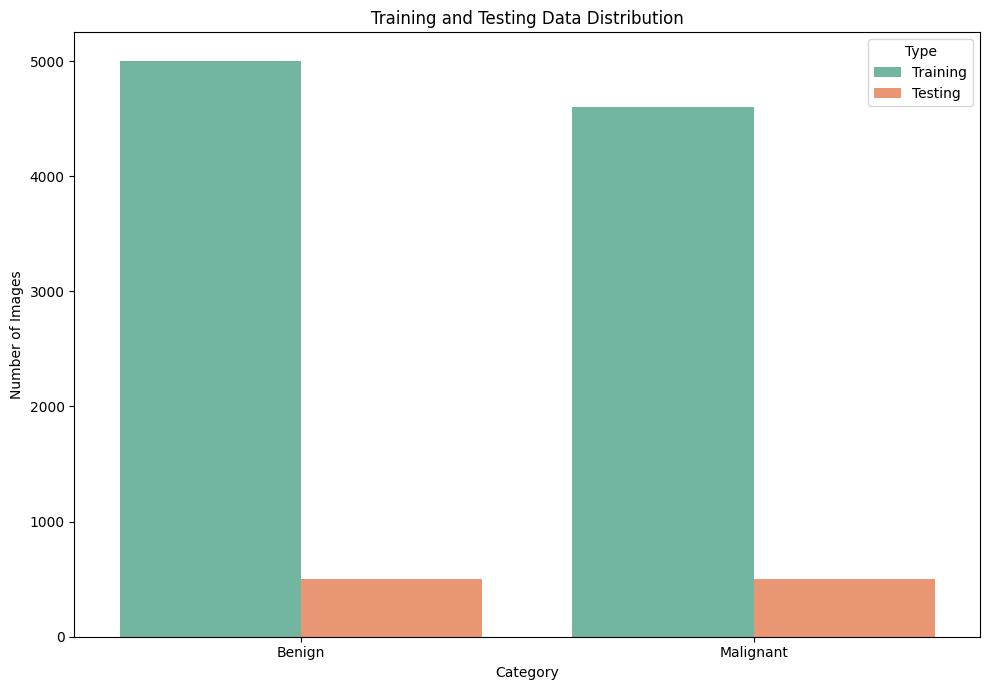

In [21]:
data = pd.DataFrame({
    'Category': ['Benign', 'Malignant', 'Benign', 'Malignant'],
    'Count': [5000, 4605, 500, 500],
    'Type': ['Training', 'Training', 'Testing', 'Testing']
})


plt.figure(figsize=(10, 7))
sns.barplot(data=data, x='Category', y='Count', hue='Type', palette='Set2')

plt.title('Training and Testing Data Distribution')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

In [22]:
# make dic with catrgory data
Category = {'benign':0,'malignant':1}

# **Data Preprocessing**

In [ ]:
# show different size of all images for training Data

sizes=[]
for folder in os.listdir(train_path):
    images=gb.glob(pathname=str(train_path +'/'+folder+'/*.jpg'))

    for img in images:
        image=plt.imread(img)
        sizes.append(image.shape)

pd.Series(sizes).value_counts()

In [ ]:
# show different size of all images for testing Data

sizes=[]
for folder in os.listdir(test_path):
    images=gb.glob(pathname=str(test_path +'/'+folder+'/*.jpg'))

    for img in images:
        image=plt.imread(img)
        sizes.append(image.shape)

pd.Series(sizes).value_counts()

**We will use resize (128,128,3) to make performance balanced speed & quality**

In [ ]:
x_train=[]
y_train=[]

for folder in os.listdir(train_path):
    images=gb.glob(pathname=str(train_path +'/'+folder+'/*.jpg'))

    for img in images:
        image=plt.imread(img)
        image=cv2.resize(image,(128,128))
        x_train.append(list(image))
        y_train.append(Category[folder])

In [ ]:
print(f'we have {len(x_train)} items in X_train')

In [ ]:
x_test=[]
y_test=[]

for folder in os.listdir(test_path):
    images=gb.glob(pathname=str(test_path +'/'+folder+'/*.jpg'))

    for img in images:
        image=plt.imread(img)
        image=cv2.resize(image,(128,128))
        x_test.append(list(image))
        y_test.append(Category[folder])

In [ ]:
print(f'we have {len(x_test)} items in x_test')

In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)

y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)